In [19]:
from collections import defaultdict
from plotly.graph_objs import Figure, Bar, Layout
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from src.data import get_news

In [20]:
all_news = get_news()

In [21]:
Figure(
    data=[
        Bar(x=[True],  y=[sum([1 for news in all_news if news.is_true])]),
        Bar(x=[False], y=[sum([1 for news in all_news if news.is_fake])]),
    ],
    layout=Layout(showlegend=False, title="News proportion", template="plotly_white")
)

In [22]:
days = {news.created_at for news in all_news if news.created_at and 2015 < news.created_at.year < 2018}
days = sorted(days)

news_per_day = defaultdict(list)

for news in all_news:
    news_per_day[news.created_at].append(news)

Figure(
    data=[
        Bar(x=days, y=[sum([1 for news in news_per_day[day] if news.is_true]) for day in days]),
        Bar(x=days, y=[sum([1 for news in news_per_day[day] if news.is_fake]) for day in days]),
    ],
    layout=Layout(title="When news were created", template="plotly_white")
)

In [23]:
subjects = list({news.subject for news in all_news})
Figure(
    data=[
        Bar(x=[subject], y=[sum([1 for news in all_news if  news.subject == subject])])
        for subject in subjects
    ],
    layout=Layout(showlegend=False, title="Subjects distribution", template="plotly_white")
)

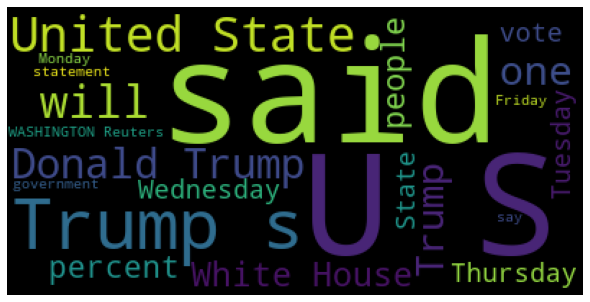

In [24]:
all_texts = ' '.join([str(news.content) for news in all_news if news.is_true])

word_cloud = WordCloud(
    stopwords=STOPWORDS,
    min_font_size=10
).generate(all_texts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

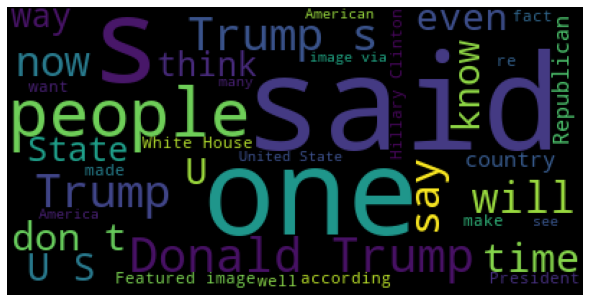

In [25]:
all_texts = ' '.join([str(news.content) for news in all_news if news.is_fake])

word_cloud = WordCloud(
    stopwords=STOPWORDS,
    min_font_size=10
).generate(all_texts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()